## **MOVIE RECOMMENDATION ANALYSIS(EDA-BASED)**



# ***Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ***Load Datasets***

In [ ]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

display(movies.head())
display(ratings.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# ***Data Understanding (Identify the rows&columns,Missing values and Data type)***

In [ ]:
print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)

print("\nMovies info:")
movies.info()

print("\nRatings info:")
ratings.info()

Movies shape: (9742, 3)
Ratings shape: (100836, 4)

Movies info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Ratings info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


# ***Data Cleaning("The datasets where checked for missing values and duplicates ,Duplicate records were removed to ensure data quality")***

In [ ]:
#Check missing values
print("Movies missing values:\n", movies.isnull().sum())
print("\nRatings missing values:\n", ratings.isnull().sum())

# Remove duplicates
movies.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)

print("\nAfter cleaning:")
print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)

Movies missing values:
 movieId    0
title      0
genres     0
dtype: int64

Ratings missing values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

After cleaning:
Movies shape: (9742, 3)
Ratings shape: (100836, 4)


# ***Dataset Merging and Analysis***

In [ ]:
# Merge movies and ratings datasets
data = pd.merge(ratings, movies, on="movieId")

print("Merged dataset shape:", data.shape)
display(data.head())

Merged dataset shape: (100836, 6)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


# **Exploratory Data Analysis(EDA)**

# ***1.Most watched Movies***

In [ ]:
most_watched = data["title"].value_counts().head(10)
print(most_watched)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64


# ***Visualization***

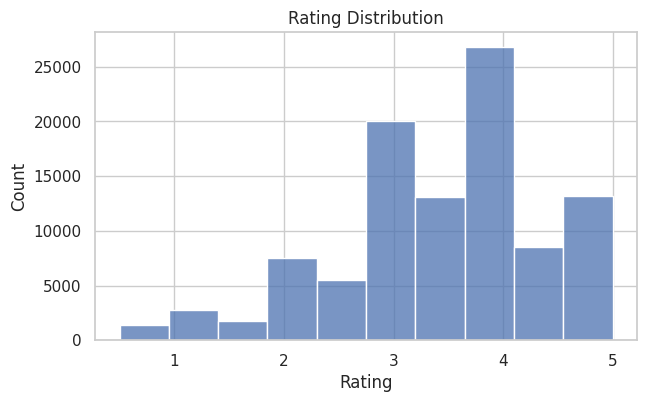

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data["rating"], bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# ***2.Top Rated Movies***

In [ ]:
rating_count = data.groupby("title")["rating"].count()
rating_mean = data.groupby("title")["rating"].mean()

summary = pd.DataFrame({
    "Average Rating": rating_mean,
    "Rating Count": rating_count
})

top_rated_movies = summary[summary["Rating Count"] >= 50] \
                    .sort_values("Average Rating", ascending=False)

display(top_rated_movies.head(10))

,Average Rating,Rating Count
title,,
"Shawshank Redemption, The (1994)",4.429022,317
"Godfather, The (1972)",4.289062,192
Fight Club (1999),4.272936,218
Cool Hand Luke (1967),4.271930,57
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041,97
Rear Window (1954),4.261905,84
"Godfather: Part II, The (1974)",4.259690,129
"Departed, The (2006)",4.252336,107
Goodfellas (1990),4.250000,126


# ***Visualization***

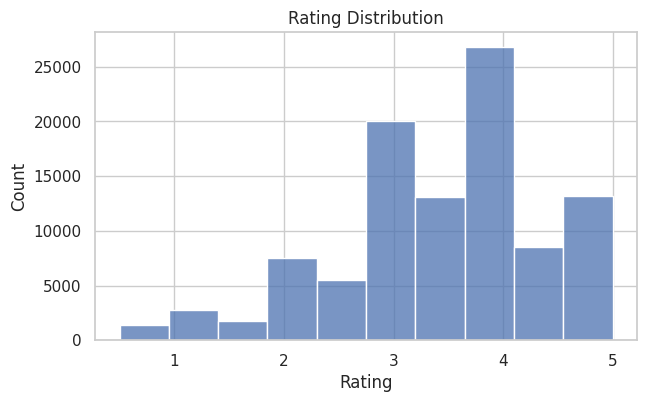

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data["rating"], bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# ***3. Genre Analysis***





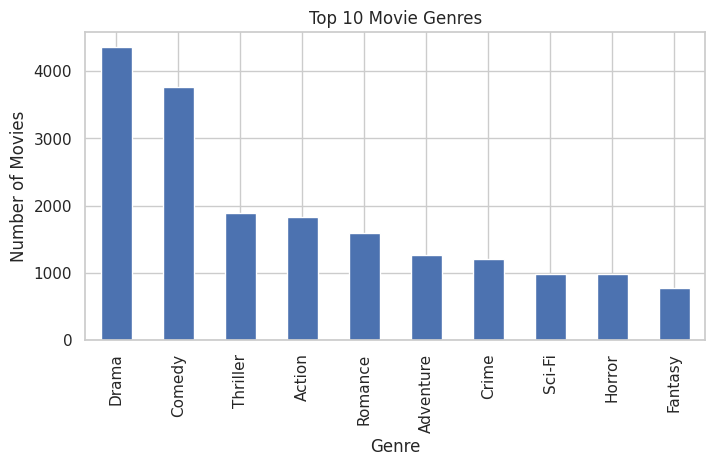

In [ ]:
# Split genres
genre_data = movies["genres"].str.split("|", expand=True)
genre_count = genre_data.stack().value_counts().head(10)

plt.figure(figsize=(8,4))
genre_count.plot(kind="bar")
plt.title("Top 10 Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

# ***4.User_based Movie Recommendation***

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Movie-User Matrix
movie_user_matrix = data.pivot_table(
    index="title",
    columns="userId",
    values="rating"
).fillna(0)

# Cosine Similarity
similarity = cosine_similarity(movie_user_matrix)

similarity_df = pd.DataFrame(
    similarity,
    index=movie_user_matrix.index,
    columns=movie_user_matrix.index
)

In [ ]:
def recommend(movie_name, n=5):
    if movie_name not in similarity_df:
        return "Movie not found in dataset"

    similar_movies = similarity_df[movie_name] \
                        .sort_values(ascending=False)[1:n+1]
    return similar_movies

recommend("Toy Story (1995)")

,Toy Story (1995)
title,
Toy Story 2 (1999),0.572601
Jurassic Park (1993),0.565637
Independence Day (a.k.a. ID4) (1996),0.564262
Star Wars: Episode IV - A New Hope (1977),0.557388
Forrest Gump (1994),0.547096


# ***5.Year_Wise Trend Analysis***

In [ ]:
# Extract year from movie title
data["Year"] = data["title"].str.extract(r"\((\d{4})\)")
data["Year"] = pd.to_numeric(data["Year"], errors="coerce")

display(data[["title", "Year"]].head())

,title,Year
0,Toy Story (1995),1995.0
1,Grumpier Old Men (1995),1995.0
2,Heat (1995),1995.0
3,Seven (a.k.a. Se7en) (1995),1995.0
4,"Usual Suspects, The (1995)",1995.0


# ***Year-wise average rating & visualization***

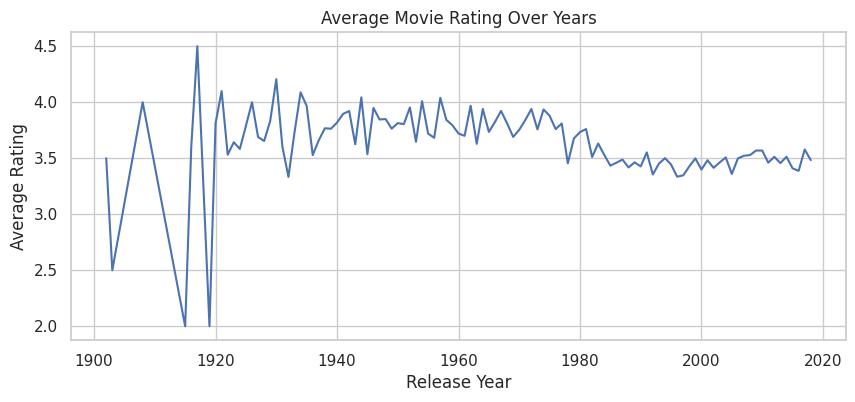

In [ ]:
year_rating = data.groupby("Year")["rating"].mean()

plt.figure(figsize=(10,4))
year_rating.plot()
plt.title("Average Movie Rating Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.show()

# ***6. Top Genres by Average Rating***

In [ ]:
# Split genres into separate rows
genre_data = data[['genres', 'rating']].copy()
genre_data = genre_data.assign(genres=genre_data['genres'].str.split('|'))
genre_data = genre_data.explode('genres')

# Genre-wise average rating
genre_avg_rating = genre_data.groupby('genres')['rating'].mean().sort_values(ascending=False)

In [ ]:
top10_genres = genre_avg_rating.head(10)
print(top10_genres)

genres
Film-Noir      3.920115
War            3.808294
Documentary    3.797785
Crime          3.658294
Drama          3.656184
Mystery        3.632460
Animation      3.629937
IMAX           3.618335
Western        3.583938
Musical        3.563678
Name: rating, dtype: float64


# ***Visualization***

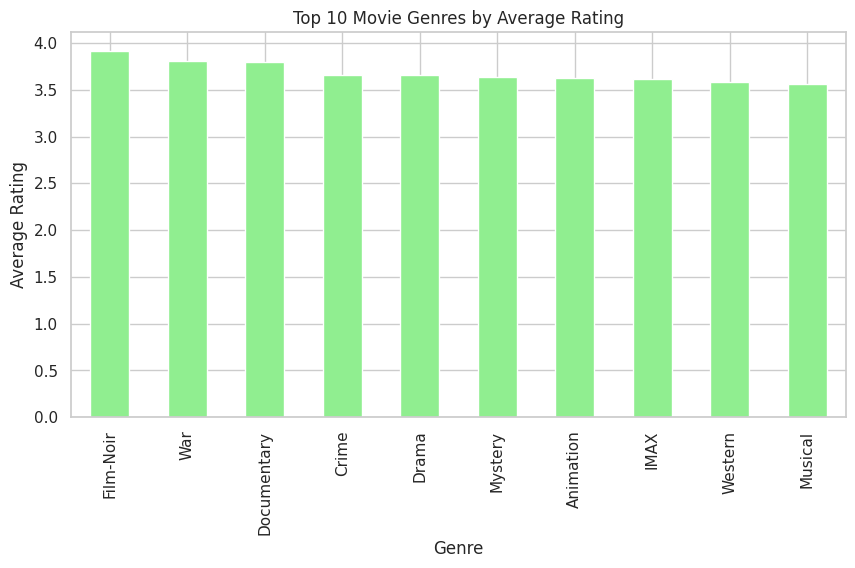

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
top10_genres.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Movie Genres by Average Rating")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()

# ***7.Outlier Detection _ Fake/Extreme Rating Analysis***

In [ ]:
import pandas as pd

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

# Merge datasets
data = pd.merge(ratings, movies, on="movieId")

# Check
print(data.head())

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


# ***Identify extreme ratings***

In [ ]:
extreme_ratings = data[(data['rating'] <= 1) | (data['rating'] >= 4.5)]

# ***count extreme ratings per user***

In [ ]:
extreme_user_count = extreme_ratings['userId'].value_counts().head(10)
extreme_user_count

,count
userId,
414,365
610,344
380,296
105,270
305,264
182,263
474,263
603,255
160,231


# ***Visulaization***

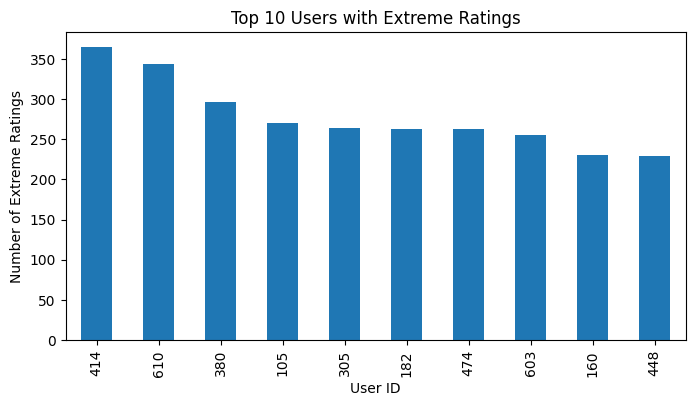

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
extreme_user_count.plot(kind='bar')
plt.title("Top 10 Users with Extreme Ratings")
plt.xlabel("User ID")
plt.ylabel("Number of Extreme Ratings")
plt.show()

# ***8.Popularity vs Rating Analysis***

# ***Rating count+average rating***

In [ ]:
movie_stats = data.groupby('title').agg(
    avg_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
)

# ***Filter popular movies***

In [ ]:
popular_movies = movie_stats[movie_stats['rating_count'] >= 100]
popular_movies.head()

,avg_rating,rating_count
title,,
2001: A Space Odyssey (1968),3.894495,109
Ace Ventura: Pet Detective (1994),3.040373,161
Aladdin (1992),3.792350,183
Alien (1979),3.969178,146
Aliens (1986),3.964286,126


# ***Scatter Plot***

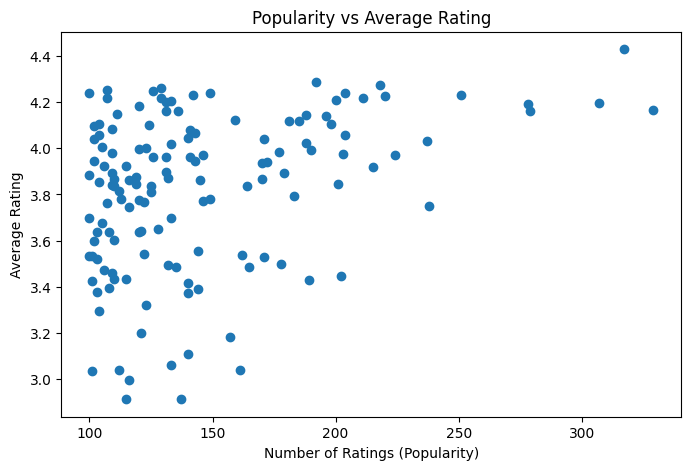

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(
    popular_movies['rating_count'],
    popular_movies['avg_rating']
)
plt.title("Popularity vs Average Rating")
plt.xlabel("Number of Ratings (Popularity)")
plt.ylabel("Average Rating")
plt.show()